[Source](https://blog.keras.io/building-autoencoders-in-keras.html)

In [2]:
%matplotlib inline

In [3]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

In [15]:
encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [16]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [8]:
(x_train, _), (x_test, _) = mnist.load_data()

In [9]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [10]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s - loss: 0.6843 - val_loss: 0.6607
Epoch 2/100
60000/60000 [==============================] - 3s - loss: 0.6440 - val_loss: 0.6272
Epoch 3/100
60000/60000 [==============================] - 4s - loss: 0.6111 - val_loss: 0.5952
Epoch 4/100
60000/60000 [==============================] - 3s - loss: 0.5802 - val_loss: 0.5655
Epoch 5/100
60000/60000 [==============================] - 3s - loss: 0.5519 - val_loss: 0.5386
Epoch 6/100
60000/60000 [==============================] - 3s - loss: 0.5264 - val_loss: 0.5146
Epoch 7/100
60000/60000 [==============================] - 3s - loss: 0.5036 - val_loss: 0.4932
Epoch 8/100
60000/60000 [==============================] - 3s - loss: 0.4835 - val_loss: 0.4744
Epoch 9/100
60000/60000 [==============================] - 2s - loss: 0.4658 - val_loss: 0.4577
Epoch 10/100
60000/60000 [==============================] - 3s - loss: 0.4501 - val_lo

60000/60000 [==============================] - 3s - loss: 0.2807 - val_loss: 0.2806
Epoch 86/100
60000/60000 [==============================] - 3s - loss: 0.2805 - val_loss: 0.2803
Epoch 87/100
60000/60000 [==============================] - 3s - loss: 0.2802 - val_loss: 0.2801
Epoch 88/100
60000/60000 [==============================] - 5s - loss: 0.2800 - val_loss: 0.2798
Epoch 89/100
60000/60000 [==============================] - 4s - loss: 0.2798 - val_loss: 0.2796
Epoch 90/100
60000/60000 [==============================] - 5s - loss: 0.2795 - val_loss: 0.2794
Epoch 91/100
60000/60000 [==============================] - 5s - loss: 0.2793 - val_loss: 0.2792
Epoch 92/100
60000/60000 [==============================] - 4s - loss: 0.2791 - val_loss: 0.2789
Epoch 93/100
60000/60000 [==============================] - 4s - loss: 0.2789 - val_loss: 0.2787
Epoch 94/100
60000/60000 [==============================] - 4s - loss: 0.2787 - val_loss: 0.2785
Epoch 95/100
60000/60000 [=================

In [13]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

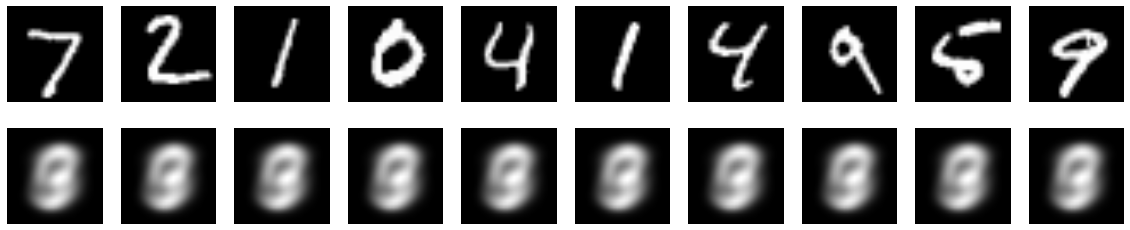

In [14]:
# use Matplotlib (don't ask)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()